In [1]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Step 2: Load the CSV
df = pd.read_csv("ipl_dataset_expanded_900.csv")

In [18]:
df.head()

,match_id,batsman,runs,bowler,wickets,economy,team,opponent,toss_winner,toss_decision,match_winner
0,22,Rahul,92,Nortje,4,9.79,PBKS,CSK,CSK,field,PBKS
1,38,Kohli,83,Boult,3,9.34,DC,RCB,RCB,field,DC
2,41,Surya,69,Nortje,2,7.14,RCB,KKR,RCB,field,KKR
3,61,Rohit,52,Boult,2,7.20,RCB,PBKS,RCB,bat,RCB
4,12,Buttler,50,Shami,4,8.80,RR,MI,RR,field,RR


In [22]:
# Create a new column: Did the toss winner also win the match?
df['toss_win_match_win'] = df['toss_winner'] == df['match_winner']


In [24]:
# Group by toss decision and whether toss winner also won the match
grouped = df.groupby(['toss_decision', 'toss_win_match_win']).size().reset_index(name='count')

# Convert boolean to readable labels
grouped['match_result'] = grouped['toss_win_match_win'].map({True: 'Won', False: 'Lost'})


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt



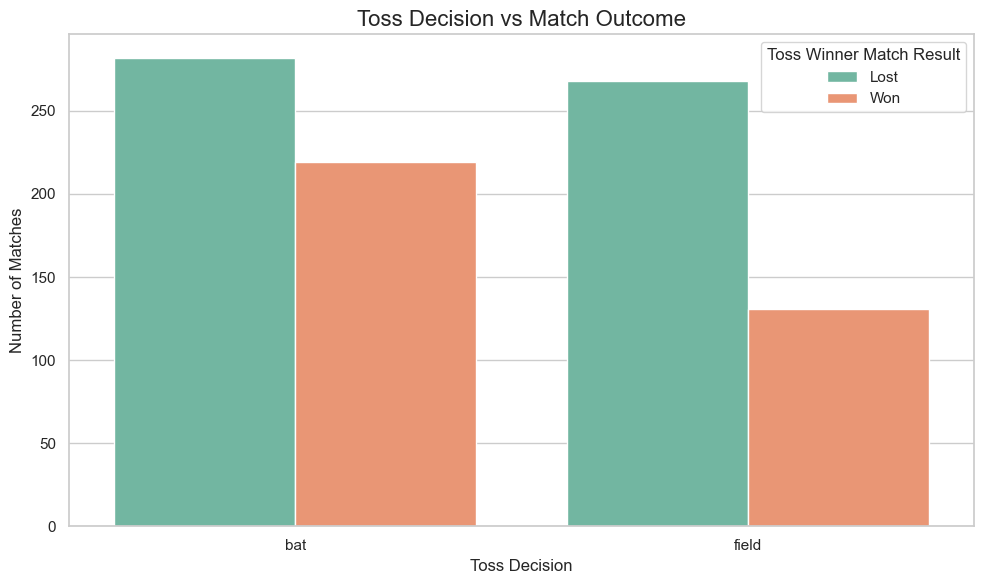

In [28]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='toss_decision', y='count', hue='match_result', palette='Set2')

plt.title('Toss Decision vs Match Outcome', fontsize=16)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.legend(title='Toss Winner Match Result')
plt.tight_layout()
plt.show()


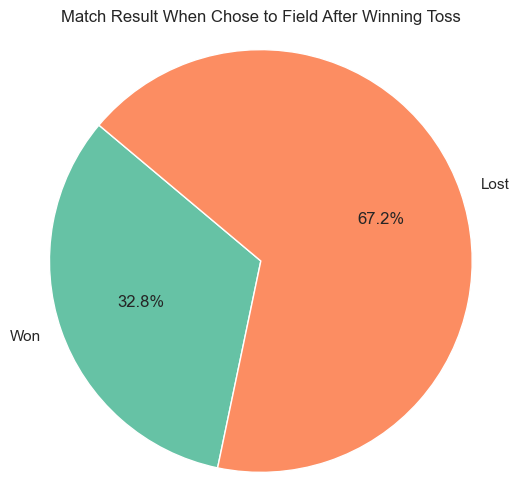

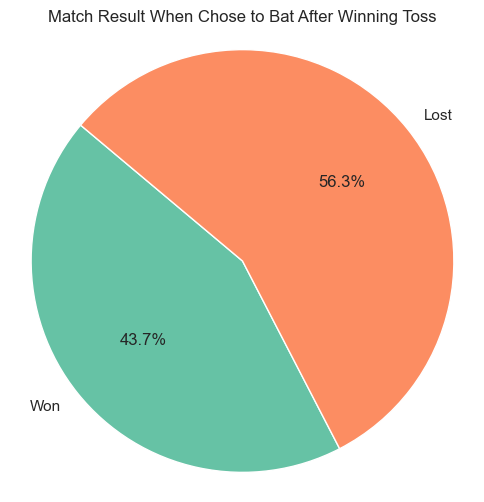

In [30]:
# Pie chart for each toss decision type
for decision in df['toss_decision'].unique():
    sub_df = df[df['toss_decision'] == decision]
    result_counts = sub_df['toss_winner'] == sub_df['match_winner']
    result_counts = result_counts.value_counts()

    # Prepare labels
    labels = ['Won', 'Lost']
    sizes = [result_counts.get(True, 0), result_counts.get(False, 0)]

    # Plot
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)
    plt.title(f'Match Result When Chose to {decision.capitalize()} After Winning Toss')
    plt.axis('equal')
    plt.show()
